In [1]:
#Data Set – Mt-cars

#In class Assignment Expectations/Steps -
#Part 1: 
#●	Load the data using Python Pandas library.

#●	Do Exploratory Data Analysis of the data and state your insights.
#Part 2: 
#●	Perform All the various feature selection techniques
#●	Provide the inferences for various methods.
#●	Perform All the various data transformation techniques 
#●	Provide the inferences for various methods.


In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
df=pd.read_csv("mtcars-1.csv")
df.head()

FileNotFoundError: [Errno 2] File b'mtcars-1.csv' does not exist: b'mtcars-1.csv'

In [5]:
df.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
model    32 non-null object
mpg      32 non-null float64
cyl      32 non-null int64
disp     32 non-null float64
hp       32 non-null int64
drat     32 non-null float64
wt       32 non-null float64
qsec     32 non-null float64
vs       32 non-null int64
am       32 non-null int64
gear     32 non-null int64
carb     32 non-null int64
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [8]:
df.isnull().sum()

model    0
mpg      0
cyl      0
disp     0
hp       0
drat     0
wt       0
qsec     0
vs       0
am       0
gear     0
carb     0
dtype: int64

In [11]:
df=df.drop("model",axis=1)
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


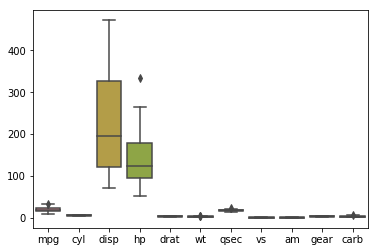

In [12]:
sns.boxplot(data=df)

In [13]:
#checking all assumptions without outliers

In [15]:
# Linear regression model

In [16]:
X=df.drop("mpg",axis=1)
Y=df["mpg"]


In [17]:
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm

In [18]:
X_constant=sm.add_constant(X)
lin_reg=sm.OLS(Y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     13.93
Date:                Wed, 04 Sep 2019   Prob (F-statistic):           3.79e-07
Time:                        15:33:31   Log-Likelihood:                -69.855
No. Observations:                  32   AIC:                             161.7
Df Residuals:                      21   BIC:                             177.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.3034     18.718      0.657      0.518     -26.623      51.229
cyl           -0.1114      1.045     -0.107      0.916      -2.285       2.062
disp           0.0133      0.018      0.747      0.463      -0.024       0.050
hp            -0.0215      0.022     -0.987      0.335      -0.067       0.024
drat           0.7871      1.635      0.481      0.635      -2.614       4.188
wt            -3.7153      1.894     -1.961      0.063      -7.655       0.224
qsec           0.8210      0.731      1.123      0.274      -0.699       2.341
vs             0.3178      2.105      0.151      0.881      -4.059       4.694
am             2.5202      2.057      1.225      0.234      -1.757       6.797
gear           0.6554      1.493      0.439      0.665      -2.450       3.761
carb          -0.1994      0.829     -0.241      0.812      -1.923       1.524
==============================================================================
Omnibus:                        1.907   Durbin-Watson:                   1.861
Prob(Omnibus):                  0.385   Jarque-Bera (JB):                1.747
Skew:                           0.521   Prob(JB):                        0.418
Kurtosis:                       2.526   Cond. No.                     1.22e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
df.shape

(32, 11)

In [23]:
X_constant.head()

,const,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,1.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,1.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,1.0,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,1.0,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,1.0,8,360.0,175,3.15,3.440,17.02,0,0,3,2


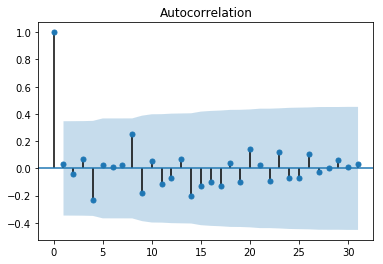

In [24]:
import statsmodels.tsa.api as smt

acf=smt.graphics.plot_acf(lin_reg.resid)
acf.show()

In [26]:
# Check Durbin-Watson:	1.861, no auto correlation between residuals

In [28]:
#Assumption 2 : Normality of residuals.

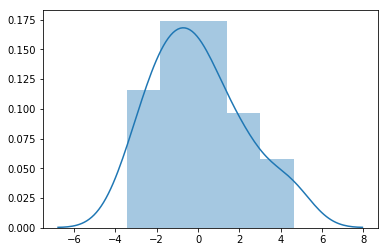

In [29]:
import seaborn as sns
sns.distplot(lin_reg.resid)

In [30]:
from scipy import stats
print(stats.jarque_bera(lin_reg.resid))

(1.7466576018548141, 0.4175592615519029)


In [31]:
# Since, value is less than 5.99( null hypo holds) , Data is normally distributed.

In [32]:
# Assumption 3: Linearity of residuals:

# Rainbow test:

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.mpl.rcParams["figure.figsize"]=(15.0,9.0)

def linearity_test(model,y):
    
    fitted_vals=lin_reg.predict()
    resids=lin_reg.resid
    
    fig,ax=plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals,y=y, ax=ax[0],line_kws={"color":"red"})
    ax[0].set_title("Observed vs Predicted values", fontsize=16)
    ax[0].set(xlabel="Predicted",ylabel="Observed")

    sns.regplot(x=fitted_vals,y=resids,lowess=True,line_kws={"color":"red"})
    ax[1].set_title("Residuals vs Predicted values", fontsize=16)
    ax[1].set(xlabel="Predicted",ylabel="Residuals")

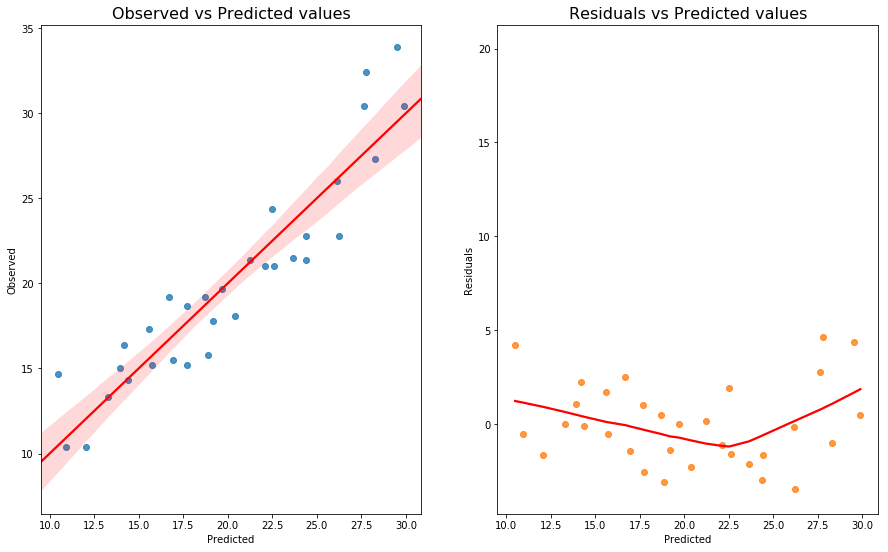

In [34]:
linearity_test(lin_reg,Y)

In [35]:
#Rainbow test:


import statsmodels.api as sm
sm.stats.diagnostic.linear_rainbow(res=lin_reg)

(3.8577111479531574, 0.0711971203895364)

In [36]:
#Null hypo: the residuals are linear.
#Alternate hypo: residuals are not linear.

# As p value is >0.05, hence the null hypothesis is accepted. So, residuals are linear.

In [37]:
# Probplot 

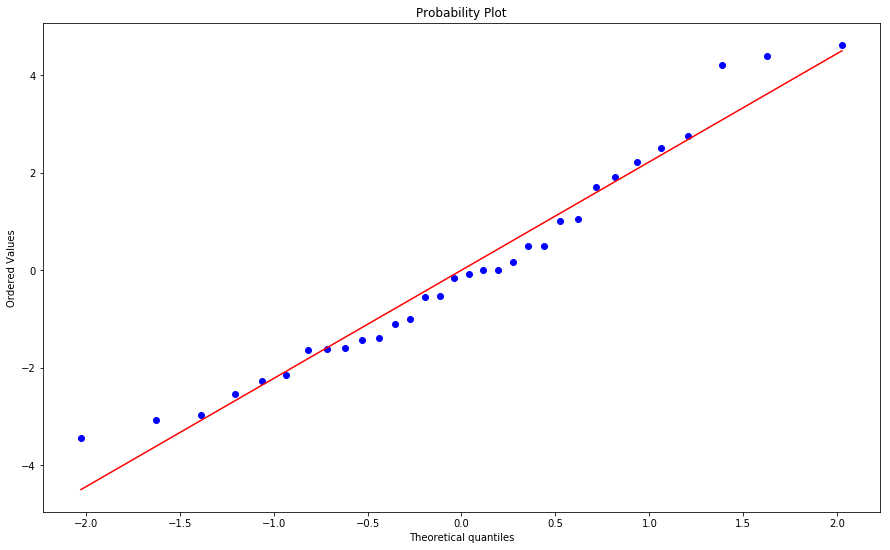

In [39]:
import scipy.stats as stats
from statsmodels.graphics.gofplots import ProbPlot
import pylab

resids=lin_reg.resid
stats.probplot(resids,dist="norm",plot=pylab)
plt.show()

In [40]:
lin_reg.resid.mean()   # we can get mean of residuals


# if mean is close to zero, linearity is present

2.0128343436454088e-13

In [41]:
 # Assumption 4: Homoscedasticity test using Goldfeld test or beush wagon test:

##lzip: combine outcome data

In [42]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name=["F statistic","p value"]
test=sms.het_goldfeldquandt(lin_reg.resid,lin_reg.model.exog)

lzip(name,test)

[('F statistic', 28.863993040889845), ('p value', 0.0010748981447214767)]

In [43]:
# # as p value is < than 0.05, null hypo is rejected.
# Null hypo is in favour of heterosedaccity

#our null hypothesis: Follows  heteroscedaccity 

In [44]:
#Assumption 5: Multicollinearity

In [45]:
df.columns

Index(['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear',
       'carb'],
      dtype='object')

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=[variance_inflation_factor(X_constant.values,i) for i in range(X_constant.shape[1])]

pd.DataFrame({"vif":vif[1:]}, index=X.columns).T

,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
vif,15.373833,21.620241,9.832037,3.37462,15.164887,7.527958,4.965873,4.648487,5.357452,7.908747


In [47]:
#Here, cyl, disp, hp,wt vif values are more than 5.99. so multi collinearity exists.

In [48]:
# We will remove one by one whose value is highest first

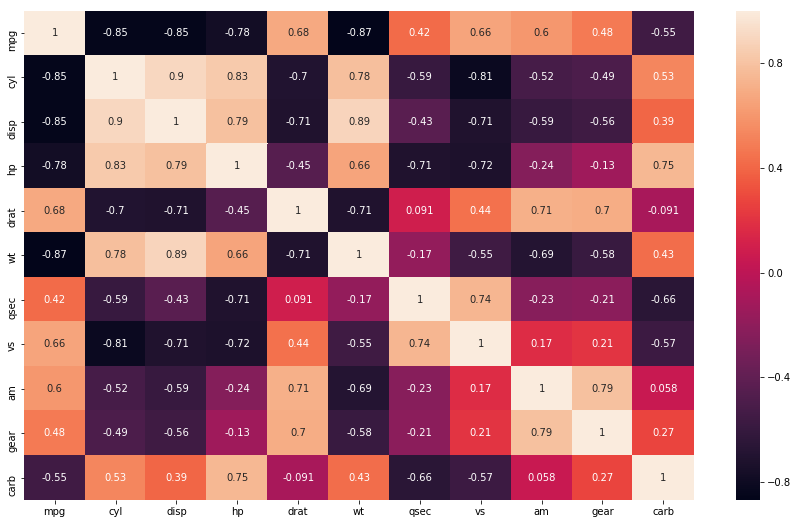

In [49]:
sns.heatmap(df.corr(),annot=True)

In [51]:
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [52]:
X_constant=X_constant.drop("disp",axis=1)
X_constant.head()

,const,cyl,hp,drat,wt,qsec,vs,am,gear,carb
0,1.0,6,110,3.90,2.620,16.46,0,1,4,4
1,1.0,6,110,3.90,2.875,17.02,0,1,4,4
2,1.0,4,93,3.85,2.320,18.61,1,1,4,1
3,1.0,6,110,3.08,3.215,19.44,1,0,3,1
4,1.0,8,175,3.15,3.440,17.02,0,0,3,2


In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


vif=[variance_inflation_factor(X_constant.values,i) for i in range(X_constant.shape[1])]

pd.DataFrame({"vif":vif[0:]},index=X_constant.columns).T

,const,cyl,hp,drat,wt,qsec,vs,am,gear,carb
vif,1595.773969,14.284737,7.123361,3.329298,6.18905,6.914423,4.916053,4.645108,5.324402,4.310597


In [59]:
# After dropping displacement, vif values have decreased so no multi collinearity.

In [60]:
X_constant.head()

,const,cyl,hp,drat,wt,qsec,vs,am,gear,carb
0,1.0,6,110,3.90,2.620,16.46,0,1,4,4
1,1.0,6,110,3.90,2.875,17.02,0,1,4,4
2,1.0,4,93,3.85,2.320,18.61,1,1,4,1
3,1.0,6,110,3.08,3.215,19.44,1,0,3,1
4,1.0,8,175,3.15,3.440,17.02,0,0,3,2


In [61]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()

In [112]:
x=df.drop(["mpg","disp"],axis=1)
y=df["mpg"]


In [113]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [125]:
LR.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [126]:
from sklearn import metrics


y_pred_all=LR.predict(x)


r2_score_all=metrics.r2_score(y,y_pred_all)
r2_score_all

0.840047713790619

In [127]:
LR.intercept_

8.363883395642441

In [128]:
LR.coef_

array([ 0.28008061, -0.01655466,  1.55102254, -2.82952374,  0.84498508,
       -1.50846493,  1.29992904,  0.55361898, -0.46235037])

In [129]:
Y_pred=LR.predict(X_test)

In [130]:
mae=metrics.mean_absolute_error(Y_test,Y_pred)

In [131]:
mae

2.9915230315811487

In [132]:
mse=metrics.mean_squared_error(Y_test,Y_pred)
mse

12.205586862843603

In [133]:
r2score=metrics.r2_score(Y_test,Y_pred)
r2score

0.792016304091927

In [134]:
RMSE=np.sqrt(mse)
RMSE

3.4936495048650205

In [135]:
score_train=LR.score(X_train,Y_train)
score_train

0.8557294602926604

In [136]:
score_test=LR.score(X_test,Y_test)
score_test

0.792016304091927

In [137]:
if (score_train>score_test):
    print("Overfitting")
else:
        print("Underfitting")

Overfitting
